In [2]:
import requests
import zipfile
import io
import polars as pl


In [3]:
df_book_trades = pl.read_csv('data/BTCUSD_PERP-bookTicker-2024-10.csv')
df_book_trades

update_id,best_bid_price,best_bid_qty,best_ask_price,best_ask_qty,transaction_time,event_time
i64,f64,f64,f64,f64,i64,i64
1040037694559,63285.8,11.0,63285.9,4555.0,1727740800014,1727740800031
1040037723920,63285.8,11.0,63285.9,4563.0,1727740800114,1727740800170
1040037787516,63285.8,11.0,63285.9,4569.0,1727740800270,1727740800400
1040037787522,63285.8,2.0,63285.9,4569.0,1727740800270,1727740800400
1040037787543,63285.8,77.0,63285.9,4569.0,1727740800270,1727740800400
…,…,…,…,…,…,…
1049735799107,63880.5,4743.0,63880.6,176.0,1728885854968,1728885854977
1049735800034,63880.5,4793.0,63880.6,176.0,1728885855113,1728885855123
1049735800196,63880.5,4793.0,63880.6,177.0,1728885855128,1728885855132


In [4]:
df_trades = pl.read_csv('data/BTCUSD_PERP-trades-2024-10.csv')
df_trades

id,price,qty,base_qty,time,is_buyer_maker
i64,f64,f64,f64,i64,bool
868134906,63285.8,1.0,0.00158,1727740800804,true
868134907,63285.8,1.0,0.00158,1727740801042,true
868134908,63285.8,1.0,0.00158,1727740801778,true
868134909,63282.7,1.0,0.00158,1727740801778,true
868134910,63282.1,1.0,0.00158,1727740801828,false
…,…,…,…,…,…
878060670,70206.9,1.0,0.001424,1730419190917,true
878060671,70206.9,9.0,0.012819,1730419190917,true
878060672,70206.9,1.0,0.001424,1730419190917,true


In [5]:
import polars as pl
import numpy as np

# Correction de l'étape 1
df_book = (
    df_book_trades  # Assurez-vous d'utiliser votre variable source (df_booktrades vs df_book_trades)
    .with_columns([
        # On spécifie explicitement que l'input est en millisecondes
        pl.from_epoch(pl.col("transaction_time"), time_unit="ms").alias("datetime"),
        
        # Calcul du Mid Price
        ((pl.col("best_bid_price") + pl.col("best_ask_price")) / 2).alias("mid_price")
    ])
    .sort("datetime")
)

# Correction de l'étape 2 (Resampling)
df_resampled = (
    df_book
    .group_by_dynamic("datetime", every="5s") # Bougies de 30 secondes
    .agg([
        pl.col("mid_price").first().alias("open"),
        pl.col("mid_price").max().alias("high"),
        pl.col("mid_price").min().alias("low"),
        pl.col("mid_price").last().alias("close"),
    ])
)

# Vérification : La shape doit être grande (ex: ~80k lignes pour un mois en 30s)
print(f"Nouvelle shape: {df_resampled.shape}")
print(df_resampled.head())

Nouvelle shape: (229008, 5)
shape: (5, 5)
┌─────────────────────┬──────────┬──────────┬──────────┬──────────┐
│ datetime            ┆ open     ┆ high     ┆ low      ┆ close    │
│ ---                 ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ datetime[ms]        ┆ f64      ┆ f64      ┆ f64      ┆ f64      │
╞═════════════════════╪══════════╪══════════╪══════════╪══════════╡
│ 2024-10-01 00:00:00 ┆ 63285.85 ┆ 63285.85 ┆ 63282.05 ┆ 63282.05 │
│ 2024-10-01 00:00:05 ┆ 63282.05 ┆ 63297.35 ┆ 63282.05 ┆ 63297.35 │
│ 2024-10-01 00:00:10 ┆ 63297.35 ┆ 63307.75 ┆ 63297.35 ┆ 63307.75 │
│ 2024-10-01 00:00:15 ┆ 63307.75 ┆ 63307.75 ┆ 63307.75 ┆ 63307.75 │
│ 2024-10-01 00:00:20 ┆ 63307.75 ┆ 63315.15 ┆ 63307.75 ┆ 63315.15 │
└─────────────────────┴──────────┴──────────┴──────────┴──────────┘


In [6]:
# import numpy as np
# from numba import jit


# import numpy as np
# from numba import jit

# @jit(nopython=True)
# def get_hurst_exponent(price_chunk, max_lag=20):
#     """
#     Calcule H sur un seul chunk de données en utilisant 
#     la méthode des écarts-types des différences de log-prix.
#     """
#     lags = np.array([2, 4, 8, 16]) # Échelles de temps (puissances de 2)
    
#     # On filtre les lags trop grands pour la fenêtre
#     valid_lags = lags[lags < len(price_chunk) // 2]
#     if len(valid_lags) < 2: 
#         return 0.5
        
#     tau = []
#     std_devs = []
    
#     # On travaille sur les Log-Prix pour stabiliser la variance
#     log_prices = np.log(price_chunk)

#     for lag in valid_lags:
#         # Calcul des rendements sur 'lag' périodes
#         # Différence entre prix à t et prix à t-lag
#         diffs = log_prices[lag:] - log_prices[:-lag]
        
#         # Écart type de ces mouvements
#         std = np.std(diffs)
        
#         if std > 0:
#             tau.append(lag)
#             std_devs.append(std)

#     if len(tau) < 2: 
#         return 0.5

#     # Régression Log-Log : log(std) = H * log(tau) + c
#     x = np.log(np.array(tau))
#     y = np.log(np.array(std_devs))
    
#     # Formule manuelle de la pente (slope)
#     n = len(x)
#     sum_x = np.sum(x)
#     sum_y = np.sum(y)
#     sum_xx = np.sum(x * x)
#     sum_xy = np.sum(x * y)
    
#     denom = (n * sum_xx - sum_x * sum_x)
#     if denom == 0: return 0.5
    
#     slope = (n * sum_xy - sum_x * sum_y) / denom
    
#     return slope

# @jit(nopython=True)
# def calculate_rolling_hurst_corrected(prices, window_size=100):
#     n = len(prices)
#     hurst_res = np.full(n, 0.5) # Initialisation à 0.5 (Random)
    
#     for i in range(window_size, n):
#         chunk = prices[i-window_size : i]
#         h = get_hurst_exponent(chunk)
#         hurst_res[i] = h
        
#     return hurst_res

In [7]:
# # 1. Préparer les données
# closes = df_resampled["close"].to_numpy()

# # 2. Lancer le calcul (Ultra rapide grâce à Numba)
# # window_size=120 correspond à 1 heure de données (120 * 30s)
# print("Calcul de Hurst en cours...")
# hurst_values = calculate_rolling_hurst_corrected(closes, window_size=120)

# # 3. Intégrer les résultats et créer la stratégie
# df_strategy = (
#     df_resampled
#     .with_columns([
#         pl.Series(name="hurst", values=hurst_values),
#         # On ajoute une EMA 50 (25 mins) pour la direction de la trend
#         pl.col("close").ewm_mean(span=50).alias("ema_trend")
#     ])
#     .with_columns([
#         # Logique de Signal
#         pl.when((pl.col("hurst") > 0.5) & (pl.col("close") > pl.col("ema_trend")))
#           .then(pl.lit(1)) # BUY (Trend forte + Prix au-dessus de la moyenne)
#           .when((pl.col("hurst") > 0.5) & (pl.col("close") < pl.col("ema_trend")))
#           .then(pl.lit(-1)) # SELL (Trend forte + Prix en-dessous de la moyenne)
#           .otherwise(pl.lit(0)) # NEUTRAL (Marché range ou aléatoire)
#           .alias("signal")
#     ])
# )

# print(df_strategy.filter(pl.col("hurst") > 0.55).tail(10))

In [8]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates


# df_pnl = (
#     df_strategy
#     .with_columns([

#         pl.col("close").log().diff().alias("market_return"),
        
#         pl.col("signal").shift(1).fill_null(0).alias("position")
#     ])
#     .with_columns([

#         (pl.col("position") * pl.col("market_return")).alias("strategy_return")
#     ])
#     .with_columns([

#         pl.col("strategy_return").cum_sum().fill_null(0).alias("cumulative_log_return")
#     ])
#     .with_columns([
#         (np.exp(pl.col("cumulative_log_return")) - 1).alias("equity_curve_pct")
#     ])
# )

# pdf_pnl = df_pnl.to_pandas()

In [9]:
# pdf_pnl['equity_curve_pct'].plot()

In [10]:
# Mise à jour de l'étape de Rééchantillonnage
df_resampled_spread = (
    df_book
    .group_by_dynamic("datetime", every="5s")
    .agg([
        # On garde le Mid pour les calculs de Hurst (le signal technique)
        pl.col("mid_price").last().alias("close"), 
        
        # On garde le Bid/Ask SPECIFIQUES pour l'exécution
        # Pour être conservateur, on prend le PIRE prix de la bougie, 
        # ou le dernier (last) pour simuler une exécution en fin de bougie.
        # Ici : exécution au 'last' de la bougie (clôture)
        pl.col("best_ask_price").last().alias("ask_close"),
        pl.col("best_bid_price").last().alias("bid_close"),
    ])
    # Calcul du Spread relatif (en points de base - bps) pour info
    .with_columns([
        ((pl.col("ask_close") - pl.col("bid_close")) / pl.col("close")).alias("spread_pct")
    ])
)

# Vérifions le spread moyen sur la période (pour voir si c'est tradable)
mean_spread = df_resampled_spread["spread_pct"].mean() * 10000
print(f"Spread moyen : {mean_spread:.2f} bps") 
# BTC est très liquide, ça devrait être autour de 1-2 bps (0.01%)

Spread moyen : 0.02 bps


In [11]:
# # Hypothèse : Frais Taker Binance Futures (VIP 0) = 0.05%
# TAKER_FEE = 0.000

# df_real_pnl = (
#     df_resampled_spread
#     .join(df_strategy.select(["datetime", "signal"]), on="datetime") # On récupère les signaux calculés
#     .with_columns([
#         # Décalage du signal : Le signal calculé à T agit à l'ouverture de T+1
#         # Mais ici, pour simplifier le vectoriel, on dit qu'on exécute au close de T quand le signal change.
#         pl.col("signal").shift(1).fill_null(0).alias("pos")
#     ])
#     .with_columns([
#         # Détection des changements de position (Trades)
#         (pl.col("pos") - pl.col("pos").shift(1).fill_null(0)).alias("trade_action")
#         #  1 = Achat (Open Long ou Close Short)
#         # -1 = Vente (Open Short ou Close Long)
#         #  2 ou -2 = Reverse direct
#     ])
# )

# # --- Calcul du PnL précis ---
# # L'astuce vectorielle :
# # Si je suis LONG à T, mon PnL dépend de la variation du BID (car je vends au bid pour sortir)
# # Si je suis SHORT à T, mon PnL dépend de la variation du ASK (car je rachète au ask)

# # Mais une méthode plus simple et robuste pour le spread est le "Cost Model" :
# # PnL = (Mid_Return * Position) - Coûts_Transaction
# # Coût_Transaction = (Half_Spread + Commission) à chaque changement de position

# df_final_test = (
#     df_real_pnl
#     .with_columns([
#         # 1. Rendement brut sur Mid-Price (Théorique)
#         pl.col("close").log().diff().fill_null(0).alias("market_ret_log"),
        
#         # 2. Demi-Spread (Le coût de traverser le spread pour aller du Mid au Bid ou Ask)
#         ((pl.col("ask_close") - pl.col("bid_close")) / 2 / pl.col("close")).alias("half_spread_cost")
#     ])
#     .with_columns([
#         # 3. Calcul du coût total à chaque fois qu'on trade
#         # Si trade_action != 0, on paie : Spread/2 + Fee
#         # Remarque : abs(trade_action) peut être 2 (Reverse Long->Short), donc on paie 2x le spread/fee, c'est correct.
#         (pl.col("trade_action").abs() * (pl.col("half_spread_cost") + TAKER_FEE)).alias("transaction_costs")
#     ])
#     .with_columns([
#         # 4. PnL Net Stratégie
#         # PnL = (Position_hier * Mvt_Marché) - Coûts_aujourd'hui
#         ( (pl.col("pos") * pl.col("market_ret_log")) - pl.col("transaction_costs") ).alias("net_log_return")
#     ])
#     .with_columns([
#         pl.col("net_log_return").cum_sum().alias("equity_curve_log")
#     ])
# )

# # Affichage résultat final
# final_pnl = np.exp(df_final_test["equity_curve_log"].tail(1).item()) - 1
# print(f"PnL Net Réaliste (avec Spread + Fees) : {final_pnl:.2%}")

In [12]:
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import matplotlib.ticker as mtick
# import numpy as np
# import polars as pl

# # Supposons que df_final_test est déjà calculé via votre code précédent.
# # Pour que ce script soit autonome, je convertis simplement le résultat en Pandas pour le plot.
# # (Dans votre workflow, vous passez directement df_final_test à ce bloc)

# # 1. Conversion Polars -> Pandas pour Matplotlib
# # On sélectionne les colonnes nécessaires
# pdf_plot = df_final_test.select([
#     "datetime", 
#     "equity_curve_log", 
#     "market_ret_log", 
#     "transaction_costs",
#     "trade_action"
# ]).to_pandas()

# # 2. Préparation des données pour le graphique
# # Stratégie : Conversion Log Return -> %
# pdf_plot['strategy_pct'] = (np.exp(pdf_plot['equity_curve_log']) - 1) * 100

# # Benchmark (Buy & Hold) : Cumsum des returns marché -> %
# pdf_plot['bnh_log'] = pdf_plot['market_ret_log'].cumsum().fillna(0)
# pdf_plot['bnh_pct'] = (np.exp(pdf_plot['bnh_log']) - 1) * 100

# # Coûts Cumulés (Spread + Fees) : Pour voir l'impact des frictions
# pdf_plot['cum_costs'] = pdf_plot['transaction_costs'].cumsum()
# # On le met en % du capital initial (approximation log)
# pdf_plot['cum_costs_pct'] = (np.exp(pdf_plot['cum_costs']) - 1) * 100

# # 3. Configuration du Graphique
# plt.style.use('bmh') # Style visuel propre
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# # --- PANNEAU 1 : PERFORMANCE ---
# # Courbe Stratégie
# ax1.plot(pdf_plot['datetime'], pdf_plot['strategy_pct'], 
#          label='Algo Hurst (Net)', color='#2980b9', linewidth=2)

# # Courbe Buy & Hold (Benchmark)
# ax1.plot(pdf_plot['datetime'], pdf_plot['bnh_pct'], 
#          label='Buy & Hold BTC', color='gray', alpha=0.5, linestyle='--', linewidth=1)

# # Remplissage vert/rouge selon si positif ou négatif
# ax1.fill_between(pdf_plot['datetime'], pdf_plot['strategy_pct'], 0, 
#                  where=(pdf_plot['strategy_pct'] >= 0), color='green', alpha=0.1)
# ax1.fill_between(pdf_plot['datetime'], pdf_plot['strategy_pct'], 0, 
#                  where=(pdf_plot['strategy_pct'] < 0), color='red', alpha=0.1)

# ax1.set_title('Performance Stratégie Hurst vs Buy & Hold (Impact Spread Inclus)', fontsize=14, fontweight='bold')
# ax1.set_ylabel('Performance Cumulée (%)')
# ax1.legend(loc='upper left')
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax1.grid(True, which='both', linestyle='--', alpha=0.7)

# # --- PANNEAU 2 : IMPACT DES COÛTS (SPREAD) ---
# # Ce graphique montre combien le marché vous a "mangé" en spread
# ax2.plot(pdf_plot['datetime'], pdf_plot['cum_costs_pct'], 
#          color='#c0392b', label='Coûts Cumulés (Spread + Fees)', linewidth=1.5)

# ax2.set_title('Impact Cumulé des Frictions (Coût du Trading)', fontsize=12)
# ax2.set_ylabel('Coût (%)')
# ax2.legend(loc='upper left')
# ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax2.fill_between(pdf_plot['datetime'], pdf_plot['cum_costs_pct'], 0, color='#c0392b', alpha=0.1)

# # --- Formatage Dates ---
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%d/%m'))
# plt.xticks(rotation=0)

# plt.tight_layout()
# plt.show()

# # --- Statistiques Finales ---
# total_ret = pdf_plot['strategy_pct'].iloc[-1]
# total_costs = pdf_plot['cum_costs_pct'].iloc[-1]
# nb_trades = pdf_plot['trade_action'].abs().sum() # Compte grossier des actions

# print(f"--- RÉSULTATS VISUELS ---")
# print(f"Performance Nette : {total_ret:.2f}%")
# print(f"Coût Total Spread : {total_costs:.2f}%")
# print(f"Nombre de trades  : {int(nb_trades)}")

Calcul de Hurst en cours...


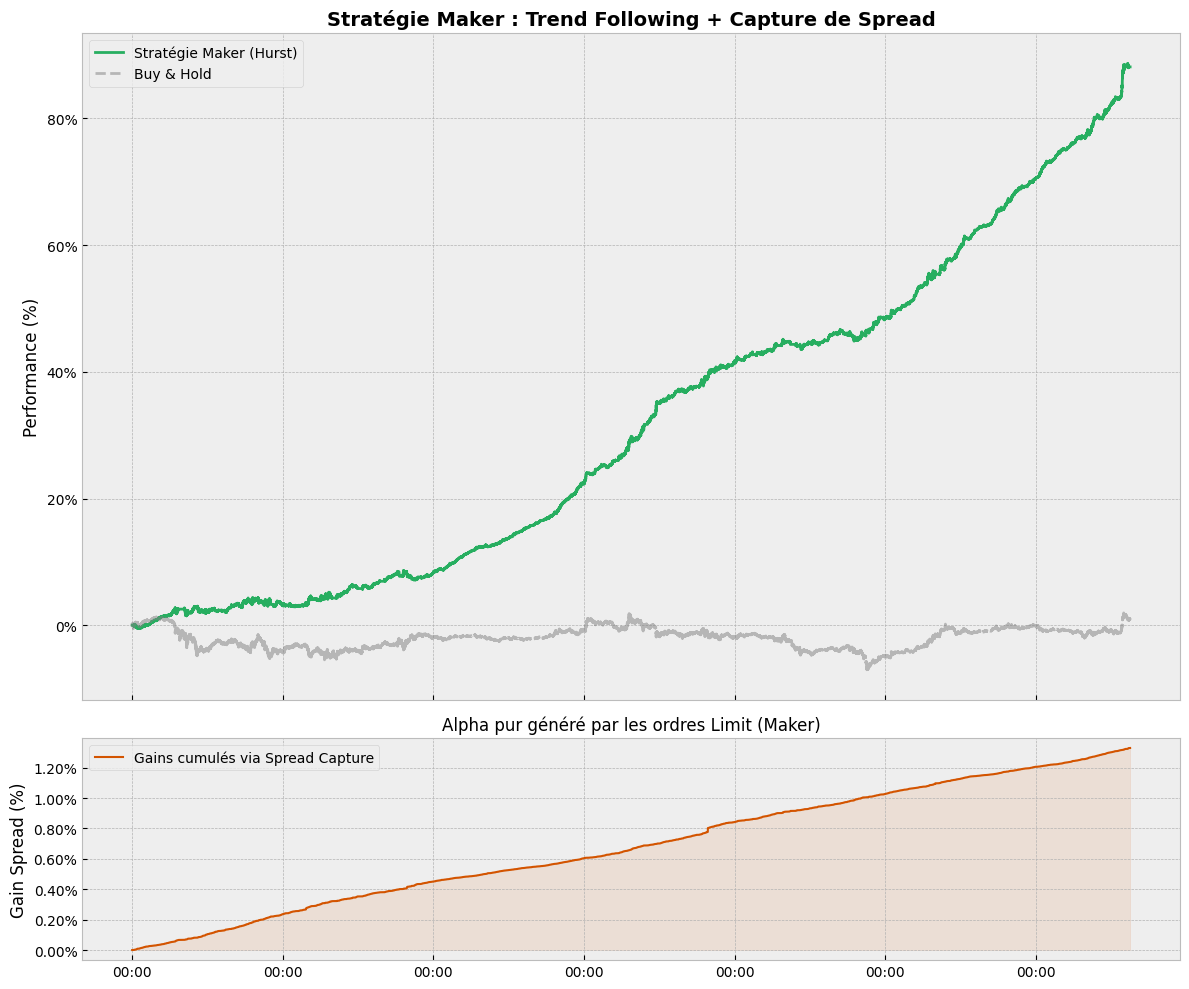

Performance Maker: 88.15%
Dont gains Spread: 1.33%


In [13]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from numba import jit

@jit(nopython=True)
def get_hurst_exponent(price_chunk):
    lags = np.array([2, 4, 8, 16])
    valid_lags = lags[lags < len(price_chunk) // 2]
    if len(valid_lags) < 2: return 0.5
        
    log_prices = np.log(price_chunk)
    tau = []
    std_devs = []

    for lag in valid_lags:
        diffs = log_prices[lag:] - log_prices[:-lag]
        std = np.std(diffs)
        if std > 0:
            tau.append(lag)
            std_devs.append(std)

    if len(tau) < 2: return 0.5

    x = np.log(np.array(tau))
    y = np.log(np.array(std_devs))
    
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)
    
    denom = (n * sum_xx - sum_x * sum_x)
    if denom == 0: return 0.5
    
    return (n * sum_xy - sum_x * sum_y) / denom

@jit(nopython=True)
def calculate_rolling_hurst_corrected(prices, window_size=100):
    n = len(prices)
    hurst_res = np.full(n, 0.5)
    for i in range(window_size, n):
        chunk = prices[i-window_size : i]
        hurst_res[i] = get_hurst_exponent(chunk)
    return hurst_res

# --- 2. CHARGEMENT ET PRÉPARATION (Simulation) ---
# NOTE: Remplacez ceci par vos chargements réels: pl.read_csv('...')
# Pour l'exemple, on suppose que df_resampled_spread existe déjà ou on le recrée.
# Si vous exécutez ce script localement, décommentez les lignes de chargement.

# Exemple de structure attendue après chargement et resampling 5s
# df_resampled_spread = ... (votre code Polars existant)

# --- BLOC LOGIQUE MAKER ---

def run_maker_strategy(df_input):
    print("Calcul de Hurst en cours...")
    closes = df_input["close"].to_numpy()
    # Calcul Hurst sur fenêtre glissante (ex: 120 * 5s = 10 minutes)
    hurst_values = calculate_rolling_hurst_corrected(closes, window_size=120*3)
    
    # 1. Génération des Signaux
    df_strategy = (
        df_input
        .with_columns([
            pl.Series(name="hurst", values=hurst_values),
            pl.col("close").ewm_mean(span=50).alias("ema_trend")
        ])
        .with_columns([
            # Logique: On veut entrer quand la trend est forte
            pl.when((pl.col("hurst") > 0.5) & (pl.col("close") > pl.col("ema_trend")))
              .then(pl.lit(1)) 
              .when((pl.col("hurst") > 0.5) & (pl.col("close") < pl.col("ema_trend")))
              .then(pl.lit(-1))
              .otherwise(pl.lit(0))
              .alias("signal")
        ])
    )

    # 2. Backtest MAKER (Capture de Spread)
    # Maker Fee: Souvent négatif (rebate) ou 0. Ici on met 0.
    MAKER_FEE = -0.000  # -1 bp de rebate
    
    df_pnl = (
        df_strategy
        .with_columns([
            # Décalage du signal (Exécution à T+1)
            pl.col("signal").shift(1).fill_null(0).alias("pos")
        ])
        .with_columns([
            # Détection des trades (Changement de position)
            (pl.col("pos") - pl.col("pos").shift(1).fill_null(0)).alias("trade_action")
        ])
        .with_columns([
            # Market Return (Mid Price)
            pl.col("close").log().diff().fill_null(0).alias("market_ret_log"),
            
            # Demi-Spread en % (C'est ce qu'on GAGNE en étant Maker par rapport au Mid)
            # Entry Long (Bid) vs Mid -> Gain
            # Exit Long (Ask) vs Mid -> Gain
            ((pl.col("ask_close") - pl.col("bid_close")) / 2 / pl.col("close")).alias("half_spread_pct")
        ])
        .with_columns([
            # LOGIQUE INVERSÉE ICI : 
            # En Taker, on soustrayait le spread.
            # En Maker, on AJOUTE le spread à chaque exécution (on capture la prime de liquidité)
            # spread_capture = abs(trade_action) * (half_spread_pct - fee)
            # Note: Si le Fee Maker > Spread, on perd. Si Fee = 0, on gagne tout le demi-spread.
            
            (pl.col("trade_action").abs() * (pl.col("half_spread_pct") - MAKER_FEE)).alias("spread_capture")
        ])
        .with_columns([
            # PnL Net = (Mvt du Marché * Position) + Capture du Spread
            ((pl.col("pos") * pl.col("market_ret_log")) + pl.col("spread_capture")).alias("net_log_return")
        ])
        .with_columns([
            pl.col("net_log_return").cum_sum().alias("equity_curve_log"),
            pl.col("spread_capture").cum_sum().alias("cum_spread_captured")
        ])
    )
    
    return df_pnl

# --- 3. EXÉCUTION ET PLOT ---

# NOTE: Cette partie suppose que 'df_resampled_spread' est disponible dans votre environnement.
# Si vous copiez-collez tout le script, assurez-vous que le dataframe est chargé avant.

if 'df_resampled_spread' in locals():
    df_maker_results = run_maker_strategy(df_resampled_spread)
    
    # Conversion Pandas pour Matplotlib
    pdf_plot = df_maker_results.select([
        "datetime", "equity_curve_log", "market_ret_log", "cum_spread_captured", "trade_action"
    ]).to_pandas()

    # Calculs pour affichage
    pdf_plot['strategy_pct'] = (np.exp(pdf_plot['equity_curve_log']) - 1) * 100
    pdf_plot['bnh_pct'] = (np.exp(pdf_plot['market_ret_log'].cumsum().fillna(0)) - 1) * 100
    pdf_plot['spread_gain_pct'] = (np.exp(pdf_plot['cum_spread_captured']) - 1) * 100

    # PLOTTING
    plt.style.use('bmh')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Panneau 1: Performance
    ax1.plot(pdf_plot['datetime'], pdf_plot['strategy_pct'], label='Stratégie Maker (Hurst)', color='#27ae60', linewidth=2)
    ax1.plot(pdf_plot['datetime'], pdf_plot['bnh_pct'], label='Buy & Hold', color='gray', alpha=0.5, linestyle='--')
    
    ax1.set_title('Stratégie Maker : Trend Following + Capture de Spread', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Performance (%)')
    ax1.legend()
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    # Panneau 2: Gains du Spread (L'avantage du Maker)
    ax2.plot(pdf_plot['datetime'], pdf_plot['spread_gain_pct'], color='#d35400', label='Gains cumulés via Spread Capture', linewidth=1.5)
    ax2.fill_between(pdf_plot['datetime'], pdf_plot['spread_gain_pct'], 0, color='#d35400', alpha=0.1)
    
    ax2.set_title('Alpha pur généré par les ordres Limit (Maker)', fontsize=12)
    ax2.set_ylabel('Gain Spread (%)')
    ax2.legend()
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.tight_layout()
    plt.show()

    print(f"Performance Maker: {pdf_plot['strategy_pct'].iloc[-1]:.2f}%")
    print(f"Dont gains Spread: {pdf_plot['spread_gain_pct'].iloc[-1]:.2f}%")
else:
    print("Erreur: Le DataFrame 'df_resampled_spread' n'est pas défini. Veuillez charger les données d'abord.")

In [14]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

def run_maker_strategy_decomposed(df_input, maker_fee=-0.0001):
    """
    maker_fee: négatif signifie un rebate (on te paie), positif on te facture.
    Exemple: -0.0001 correspond à un rebate de 1 bp (Bybit/Binance VIP).
    """
    
    # ... (Calculs Hurst / Signal précédents inchangés) ...
    # Pour l'exemple, on recrée une colonne signal dummy si tu n'as pas le Hurst chargé
    # Si tu as déjà ton df avec 'signal', saute cette partie dummy.
    closes = df_input["close"].to_numpy()
    hurst_values = calculate_rolling_hurst_corrected(closes, window_size=360) # Utilise ta fonction numba
    
    df_step1 = df_input.with_columns([
        pl.Series(name="hurst", values=hurst_values),
        pl.col("close").ewm_mean(span=50).alias("ema_trend")
    ]).with_columns([
        pl.when((pl.col("hurst") > 0.5) & (pl.col("close") > pl.col("ema_trend"))).then(pl.lit(1))
          .when((pl.col("hurst") > 0.5) & (pl.col("close") < pl.col("ema_trend"))).then(pl.lit(-1))
          .otherwise(pl.lit(0)).alias("signal")
    ])

    # --- CŒUR DE LA DÉCOMPOSITION ---
    df_pnl = (
        df_step1
        .with_columns([
            # 1. Position décalée (On trade sur le signal de la bougie précédente)
            pl.col("signal").shift(1).fill_null(0).alias("pos")
        ])
        .with_columns([
            # 2. Détection d'activité de trade (Entrée, Sortie ou Reverse)
            (pl.col("pos") - pl.col("pos").shift(1).fill_null(0)).alias("trade_action"),
            
            # 3. Market Return (Log)
            pl.col("close").log().diff().fill_null(0).alias("market_ret_log"),
            
            # 4. Demi-Spread disponible (Theoretical Edge)
            ((pl.col("ask_close") - pl.col("bid_close")) / 2 / pl.col("close")).alias("half_spread_pct")
        ])
        .with_columns([
            # === COMPOSANTE A : PnL DIRECTIONNEL ===
            # C'est le Beta : Je suis Long et le marché monte -> Je gagne
            (pl.col("pos") * pl.col("market_ret_log")).alias("pnl_log_directional"),

            # === COMPOSANTE B : PnL EXÉCUTION (Spread + Fees) ===
            # Chaque fois que je bouge (trade_action != 0), je paie/gagne le spread et les fees.
            # En MAKER : Je gagne le demi-spread, je paie (ou reçois) le fee.
            # Formule : |DeltaPos| * (DemiSpread - Fee)
            (pl.col("trade_action").abs() * (pl.col("half_spread_pct") - maker_fee)).alias("pnl_log_execution")
        ])
        .with_columns([
            # Totaux cumulés pour les courbes
            pl.col("pnl_log_directional").cum_sum().alias("cum_pnl_directional"),
            pl.col("pnl_log_execution").cum_sum().alias("cum_pnl_execution"),
            
            # TOTAL NET
            (pl.col("pnl_log_directional") + pl.col("pnl_log_execution")).cum_sum().alias("cum_pnl_total")
        ])
    )
    
    return df_pnl

# Exécution
# Supposons que df_resampled_spread est prêt
df_results = run_maker_strategy_decomposed(df_resampled_spread, maker_fee=-0.0001) # Rebate de 1bp

In [15]:
def print_performance_report(df_res):
    # On récupère les sommes finales
    total_trades = df_res["trade_action"].abs().sum()
    
    # Conversion Log returns -> Pourcentage simple approximatif
    total_dir_pct = df_res["pnl_log_directional"].sum() * 100
    total_exec_pct = df_res["pnl_log_execution"].sum() * 100
    total_net_pct = df_res["cum_pnl_total"].tail(1).item() * 100
    
    print("="*40)
    print("📊 DÉCOMPOSITION DU PnL (MAKER STRAT)")
    print("="*40)
    print(f"Nb de Trades       : {int(total_trades)}")
    print("-" * 40)
    print(f"1. PnL Directionnel: {total_dir_pct:+.2f} %  (Qualité du Signal)")
    print(f"2. PnL Exécution   : {total_exec_pct:+.2f} %  (Gains du Spread + Rebates)")
    print("-" * 40)
    print(f"🏁 TOTAL NET       : {total_net_pct:+.2f} %")
    print("="*40)
    
    if total_trades > 0:
        avg_trade = total_net_pct / total_trades
        print(f"Moyenne par trade  : {avg_trade*10000:.2f} bps")

# Afficher le rapport
print_performance_report(df_results)

📊 DÉCOMPOSITION DU PnL (MAKER STRAT)
Nb de Trades       : 15830
----------------------------------------
1. PnL Directionnel: +61.88 %  (Qualité du Signal)
2. PnL Exécution   : +159.62 %  (Gains du Spread + Rebates)
----------------------------------------
🏁 TOTAL NET       : +221.50 %
Moyenne par trade  : 139.93 bps


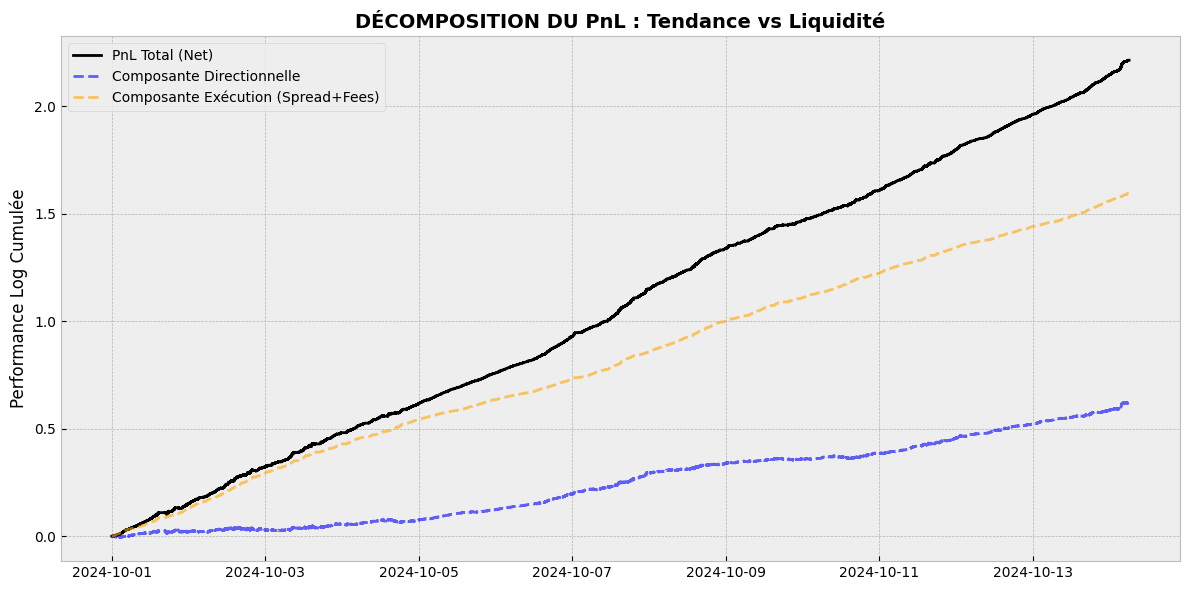

In [17]:
# Conversion Pandas pour plot
pdf = df_results.select(["datetime", "cum_pnl_directional", "cum_pnl_execution", "cum_pnl_total"]).to_pandas()

plt.figure(figsize=(12, 6))

# Zone empilée pour montrer la contribution
plt.plot(pdf['datetime'], pdf['cum_pnl_total'], label='PnL Total (Net)', color='black', linewidth=2)
plt.plot(pdf['datetime'], pdf['cum_pnl_directional'], label='Composante Directionnelle', color='blue', alpha=0.6, linestyle='--')
plt.plot(pdf['datetime'], pdf['cum_pnl_execution'], label='Composante Exécution (Spread+Fees)', color='orange', alpha=0.6, linestyle='--')

plt.title('DÉCOMPOSITION DU PnL : Tendance vs Liquidité', fontsize=14, fontweight='bold')
plt.ylabel('Performance Log Cumulée')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()